# 𝕏 - previously Twitter

**Collects** a lot of **data** continously and in a daily basis 
we've requested **𝕏/Twitter** some data.<br> We'll dive in the structure 
of **data** and do some data analysis and exploration

## Folder Structure upon request

### -> Twitter

       --> assets
               <--> fonts
               <--> images
               <--> js
        --> data
                <--> community_tweet_media
                <--> ---
                <--> account.js
                <--> like.js
                <--> follower.js
                <--> following.js
                <--> ---
                <--> ---

There is bunch of stuffs collected by **𝕏/Twitter**. The files dot **js** are semi-structured
and in **json format**

In [273]:
#Importing the necessary libraries
import numpy as np
import seaborn as sns
import pandas as pd
from os import path
import statsmodels.api as sm
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import pandas as pd
from sklearn.datasets import fetch_20newsgroups

### Reading and extracting json file

In [274]:
import json
import demjson

def read_json(file):
    """
        Read a json file
        
        Arguments:
            
            file: 𝕏/js
        Returns:
        
            list json decode
        
        """
    with open(file) as dataFile:
        data = dataFile.read()
        json_out = data[data.find('['): data.rfind(']')+1]
        json_decode = demjson.decode(json_out)
    return json_decode

like_json=read_json("like.js")
print(type(like_json))

<class 'list'>


In [275]:
#function for building the dataframe for data manipulations
def dataFrame_builder(list_json,key):
    """
        Build a dataframe from a json file
        
        Arguments:
            
            list_json: a json list
            
            key : string
        Returns:
        
            the built dataframe
        
    """
    dic=np.array(list_json)
    df=pd.DataFrame([x[key] for x in dic])
    return df

In [276]:
dic= np.array(like_json)

In [277]:
dic[-1]['like']

{'tweetId': '1644064358295654421',
 'fullText': 'Info du jour:\n\nLe Brésil, la Russie, l’Inde, la Chine et l’Afrique du Sud ont maintenant un poids économique plus important que le G7 (Canada, France, Allemagne, Italie, Japon, Royaume-Uni et USA) avec 31,5 % du produit intérieur brut (PIB) mondial contre 30,7 % pour le G7.',
 'expandedUrl': 'https://twitter.com/i/web/status/1644064358295654421'}

In [278]:
df_like=dataFrame_builder(like_json,'like')

In [279]:
type(df_like)

pandas.core.frame.DataFrame

In [280]:
df_like.head()

,tweetId,expandedUrl,fullText
0,1725997320762757529,https://twitter.com/i/web/status/1725997320762...,NaN
1,1725929076274184699,https://twitter.com/i/web/status/1725929076274...,Major corporations that have announced boycott...
2,1725913354185945452,https://twitter.com/i/web/status/1725913354185...,https://t.co/8oLFUkNMNa
3,1725742245775618172,https://twitter.com/i/web/status/1725742245775...,Mission accomplie ! J’ai soutenu ma thèse de d...
4,1725771191644758037,https://twitter.com/i/web/status/1725771191644...,"The split second court opens on Monday, X Corp..."


A preview of every **liked tweet** by the user
It contains the tweetId,   an expandedUrl of the liked tweet,<br> the fullText or content of that tweet. <br><br>
We will perform data cleaning to ensure that null values or incomplete **tweets** are wiped out.

In [281]:
df_like.any()

tweetId        True
expandedUrl    True
fullText       True
dtype: bool

In [282]:
df_like.dropna(inplace=True)
df_like.reset_index(drop=True, inplace=True)

In [283]:
df_like.shape

(1281, 3)

In [284]:
tweetId = df_like.groupby("tweetId")

In [285]:
# Summary statistic of all tweetID
df_like['fullText'].value_counts().head()

fullText
This Post is from a suspended account. {learnmore}                                                                                                                                                                                                                                9
@Cmi_kamalos Congratulations                                                                                                                                                                                                                                                      3
Twitter will have more impact on landing your next job than your résumé.                                                                                                                                                                                                          2
…le ministre des affaires étrangères de Natenyehu demande à @antonioguterres  de démissionner parce qu’il a osé réclamer un cessez le feu humanitaire immédiat et q

Text(0.5, 0, 'number of likes')

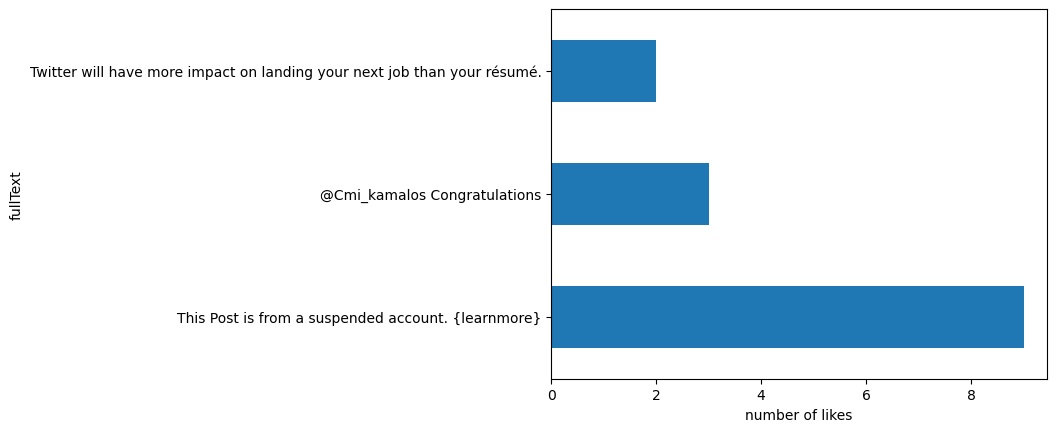

In [286]:
ax = df_like['fullText'].value_counts().head(3).plot(kind='barh')
ax.set_xlabel('number of likes', fontsize=10)

It seems that the most **liked tweet** are those from suspended account. We saw **9** tweets, then when user liked <br>
every post wishing him **Congratulations**,...<br> <br>
It's obvious that suspended still, either their content freezed or replaced completely

In [287]:
df_like.query('fullText.str.contains("deleted account")',engine='python')

,tweetId,expandedUrl,fullText


We returned an empty request. **𝕏/Twitter**, moves out deleted accounts or doesn't include them here

In [288]:
#from statsmodels.graphics.mosaicplot import mosaic
#plt.rcParams['font.size'] = 16.0
#mosaic(df, ['expandedUrl', 'fullText']);

Droping suspended account, translating all liked tweets into a target language,<br>
### Creating a word cloud

In [289]:
#function that translated text by calling the google api

from deep_translator import GoogleTranslator

def get_translate(text):
    """
        translate a text into english
        
        Arguments:
            
            text: String
        Returns:
        
            String of translated text
        
        """
    translate=GoogleTranslator(source='auto', target='en').translate(text)
    return translate



### Deleting suspended accounts
### Filtering languages based on their ascii code

In [290]:
df_like=df_like[~df_like.fullText.str.contains('|'.join(["suspended"]))]
df_like=df_like[df_like['fullText'].map(lambda x: x.isascii())]
df_like.reset_index(drop=True,inplace=True)
df_like.shape

(266, 3)

In [291]:
translated_text=" ".join(get_translate(text) for text in df_like.fullText)

We will do whatever it takes to support your right to free speech! https://t.co/fdwOWguuko


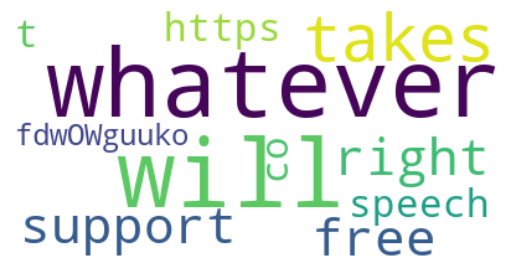

In [292]:
# Start with word cloud one liked tweet text:
text = df_like.fullText[6]
print(text)

# Create and generate a word cloud image:

wordcloud = WordCloud( background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [293]:
print ("There are {} words in all liked text.".format(len(translated_text)))


There are 28833 words in all liked text.


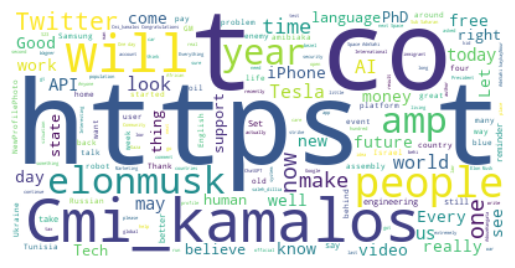

In [294]:
# Generate a word cloud image
wordcloud = WordCloud(background_color="white").generate(translated_text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [295]:
### Analysis of sentiment in liked tweet

In [296]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [297]:
sentiment = SentimentIntensityAnalyzer()
sent = sentiment.polarity_scores(translated_text)

In [298]:
print("Sentiment of the text:", sent)

Sentiment of the text: {'neg': 0.078, 'neu': 0.786, 'pos': 0.136, 'compound': 0.9998}


Algorithm has shown **neutrality** of  78 percent while **positivity** resulting in 13 percent

## Follow and follower
In this section, we explore the follow and the following of the 
### user
on **𝕏/Twitter**. Does a **Tweet** is tied with **use** in our database ?

In [299]:
#read and build the follower dataframe
follower_json=read_json('follower.js')
df_follower=dataFrame_builder(follower_json,'follower')
df_follower.head()

,accountId,userLink
0,1655113826654666752,https://twitter.com/intent/user?user_id=165511...
1,1712133460997931008,https://twitter.com/intent/user?user_id=171213...
2,1169614511625658370,https://twitter.com/intent/user?user_id=116961...
3,1707484113903534080,https://twitter.com/intent/user?user_id=170748...
4,1599040994602876928,https://twitter.com/intent/user?user_id=159904...


In [300]:
#read and build the following dataframe

In [301]:
following_json=read_json('following.js')
df_following=dataFrame_builder(following_json,'following')
df_following.head()

,accountId,userLink
0,2317862234,https://twitter.com/intent/user?user_id=231786...
1,1446231057259433988,https://twitter.com/intent/user?user_id=144623...
2,1284037838066061313,https://twitter.com/intent/user?user_id=128403...
3,900024954254766080,https://twitter.com/intent/user?user_id=900024...
4,1722916109916000256,https://twitter.com/intent/user?user_id=172291...


### Merging the two datasets

In [302]:
follower_merge=df_follower.merge(df_following,on="accountId",suffixes=("_follower","_following"))

In [303]:
follower_merge.head(3)

,accountId,userLink_follower,userLink_following
0,1537550970871332873,https://twitter.com/intent/user?user_id=153755...,https://twitter.com/intent/user?user_id=153755...
1,1546510763392638983,https://twitter.com/intent/user?user_id=154651...,https://twitter.com/intent/user?user_id=154651...
2,1202014368126423041,https://twitter.com/intent/user?user_id=120201...,https://twitter.com/intent/user?user_id=120201...


In [304]:
row_count = len(follower_merge)

print(f' People and user who have been following each other equals to {row_count} ')

 People and user who have been following each other equals to 105 


## Testing wether a liked tweet correspond to a follower Id

In [305]:
account_twitt=follower_merge.merge(df_like,left_on="accountId",right_on="tweetId")

In [306]:
account_twitt.head()

,accountId,userLink_follower,userLink_following,tweetId,expandedUrl,fullText


<br><br><br>This is the end of the data exploration mission. We have seen how to do a data exploration, asking the right questions, and draw a conclusion. <br> <br>
Real world **data** are messy, they might different structures than an usual dataset. It's our **mission** to deal <br> with and make the right use depending on their state (critical or not). <br> <br>

Next step, to take if you want to make your hands dirty with **𝕏/Twitter**. Go for the developper account !!! <br><br>
Your imagination is the limit
